In [23]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

__1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?__

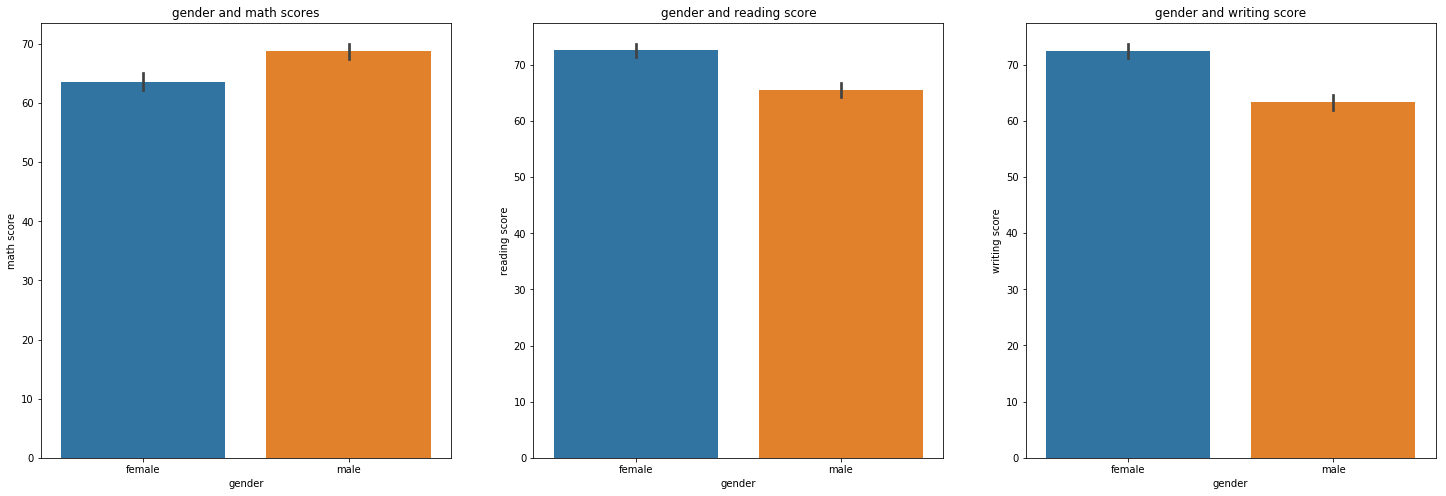

In [10]:
def cat_cont(column):
    plt.figure(figsize=(25, 8))
    
    plt.subplot(1, 3, 1)
    sns.barplot(df[column], df['math score'])
    plt.title('{} and math scores'.format(column))
    
    plt.subplot(1, 3, 2)
    sns.barplot(df[column], df['reading score'])
    plt.title('{} and reading score'.format(column))
    
    plt.subplot(1, 3, 3)
    sns.barplot(df[column], df['writing score'])
    plt.title('{} and writing score'.format(column))
    
    plt.show()
    
cat_cont('gender')    

It looks like males do slightly better at math and females crush the males in reading and writing.

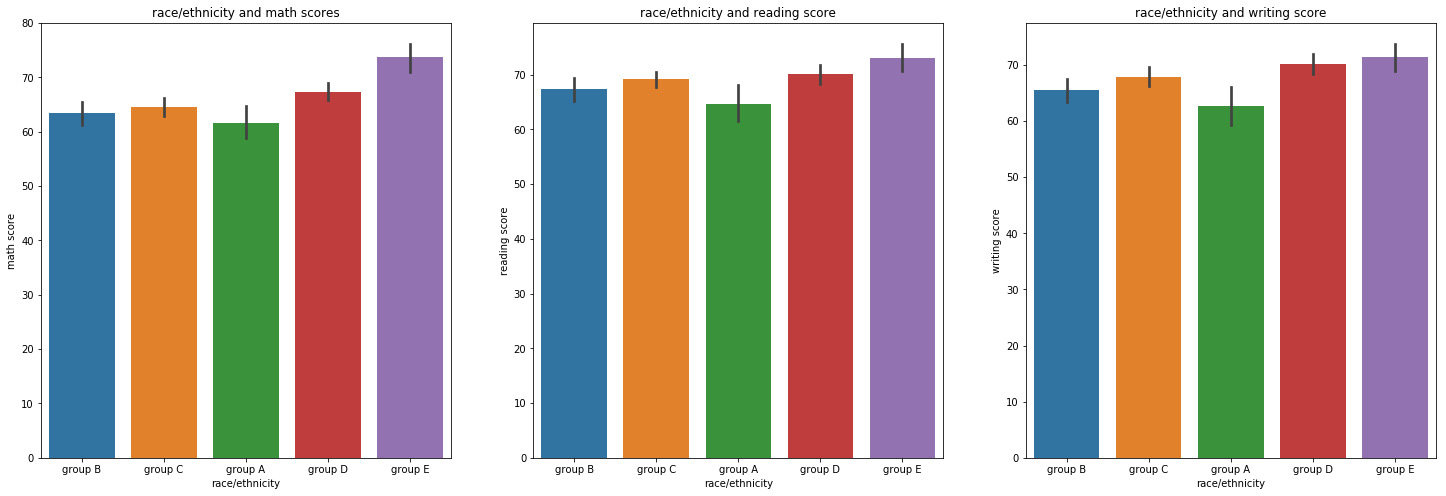

In [11]:
cat_cont('race/ethnicity')

It appears that group A is the least successful across the board and group E is the most successful.

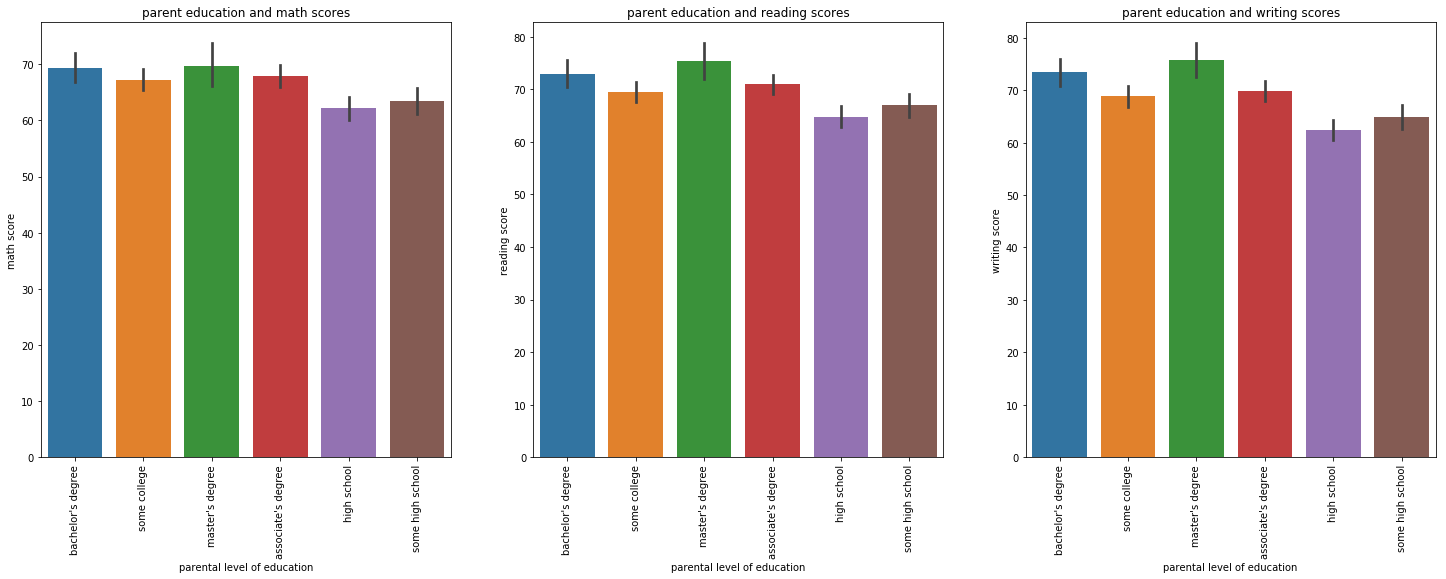

In [17]:
plt.figure(figsize=(25, 8))
    
plt.subplot(1, 3, 1)
sns.barplot(df['parental level of education'], df['math score'])
plt.title('parent education and math scores')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 2)
sns.barplot(df['parental level of education'], df['reading score'])
plt.title('parent education and reading scores')
plt.xticks(rotation='vertical')

plt.subplot(1, 3, 3)
sns.barplot(df['parental level of education'], df['writing score'])
plt.title('parent education and writing scores')
plt.xticks(rotation='vertical')

plt.show()

The collegiate level results are not that surprising, but it's interesting that high school underperforms some high school.

In [18]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [38]:
genders = df['gender'].unique()

vars = ['math score', 'reading score', 'writing score']

for var in vars:
    print('')
    print('Looking at {} now'.format(var))

    for i in range(len(genders)):
        for j in range(i+1, len(genders)):
                print('Comparison between {} and {}'.format(gender[i], gender[j]))
                print(stats.ttest_ind(df.loc[df['gender'] == gender[i], var], df.loc[df['gender'] == gender[j], var]))


Looking at math score now
Comparison between female and male
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)

Looking at reading score now
Comparison between female and male
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)

Looking at writing score now
Comparison between female and male
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


In [39]:
races = df['race/ethnicity'].unique()

for var in vars:
    print('')
    print('Looking at {} now'.format(var))
    print('')
    for i in range(len(genders)):
        for j in range(i+1, len(races)):
                print('Comparison between {} and {}'.format(races[i], races[j]))
                print(stats.ttest_ind(df.loc[df['race/ethnicity'] == races[i], var], df.loc[df['race/ethnicity'] == races[j], var]))


Looking at math score now

Comparison between group B and group C
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
Comparison between group B and group A
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
Comparison between group B and group D
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
Comparison between group B and group E
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
Comparison between group C and group A
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
Comparison between group C and group D
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
Comparison between group C and group E
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)

Looking at reading score now

Comparison between group B and group C
Ttest_indResult(statistic=-1.3223156212901772, pvalue=0.1866592809035069)
Comparison between group B and gro

In [40]:
parents = df['parental level of education'].unique()
sub = 'parental level of education'

for var in vars:
    print('')
    print('Looking at {} now'.format(var))
    print('')
    for i in range(len(parents)):
        for j in range(i+1, len(parents)):
                print('Comparison between {} and {}'.format(parents[i], parents[j]))
                print(stats.ttest_ind(df.loc[df[sub] == parents[i], var], df.loc[df[sub] == parents[j], var]))


Looking at math score now

Comparison between bachelor's degree and some college
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
Comparison between bachelor's degree and master's degree
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
Comparison between bachelor's degree and associate's degree
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
Comparison between bachelor's degree and high school
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
Comparison between bachelor's degree and some high school
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
Comparison between some college and master's degree
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
Comparison between some college and associate's degree
Ttest_indResult(statistic=-0.5426842696247527, pvalue=0.5876182809234072)
Comparison between some college and high school
Ttest_indRes

It looks like our most consistently significant value is gender.

__2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?__

In [41]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


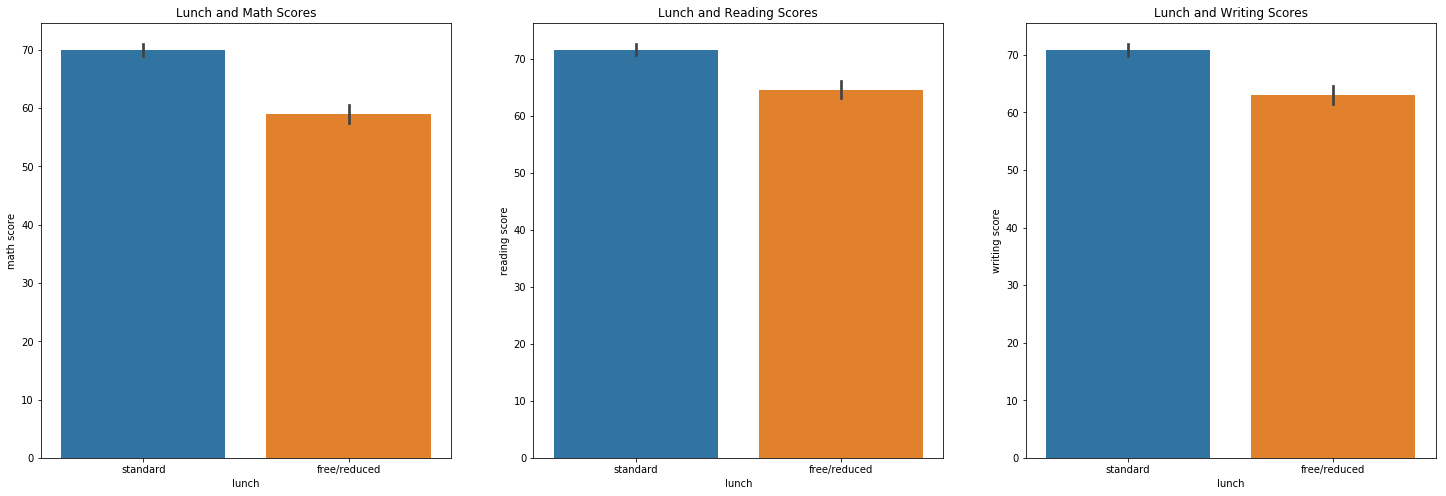

In [42]:
plt.figure(figsize=(25, 8 ))

plt.subplot(1, 3, 1)
sns.barplot(df['lunch'], df['math score'])
plt.title('Lunch and Math Scores')


plt.subplot(1, 3, 2)
sns.barplot(df['lunch'], df['reading score'])
plt.title('Lunch and Reading Scores')


plt.subplot(1, 3, 3)
sns.barplot(df['lunch'], df['writing score'])
plt.title('Lunch and Writing Scores')

plt.show()

In [46]:
stats.ttest_ind(df.loc[df.lunch == 'standard', 'math score'], df.loc[df.lunch == 'free/reduced', 'math score'])

Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)

In [47]:
stats.ttest_ind(df.loc[df.lunch == 'standard', 'reading score'], df.loc[df.lunch == 'free/reduced', 'reading score'])

Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)

In [48]:
stats.ttest_ind(df.loc[df.lunch == 'standard', 'writing score'], df.loc[df.lunch == 'free/reduced', 'writing score'])

Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)

All siginificant! It's fairly well known that a good indicator of educational performance is the family's income level.

__3. Does the test preparation course seem to have an effect on the exam performances?__

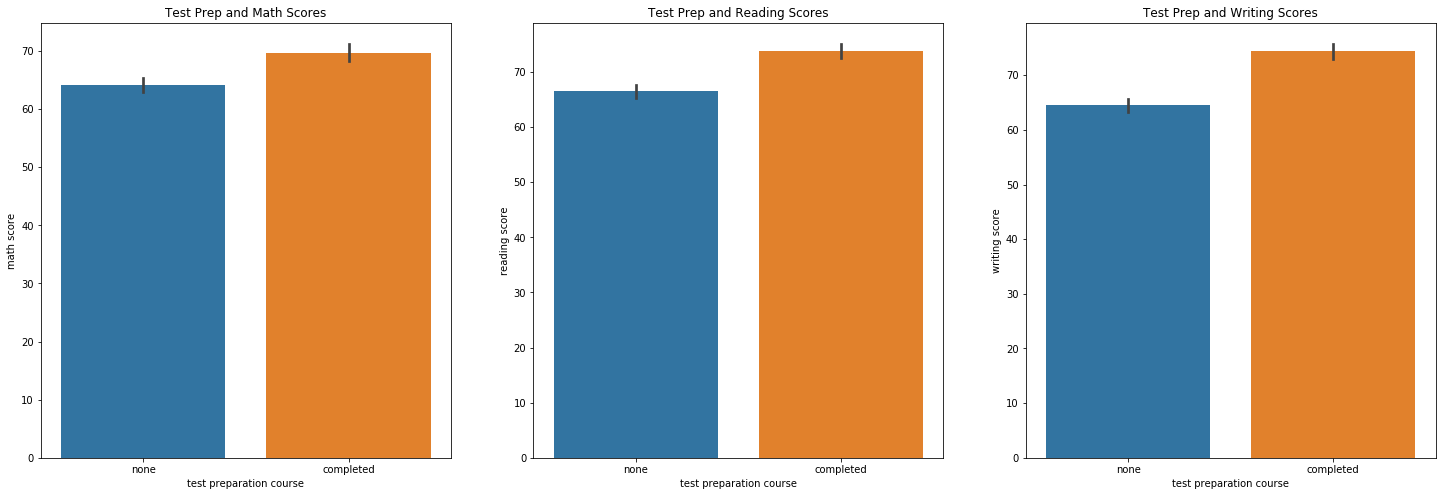

In [50]:
sub = 'test preparation course'
plt.figure(figsize=(25, 8 ))

plt.subplot(1, 3, 1)
sns.barplot(df[sub], df['math score'])
plt.title('Test Prep and Math Scores')


plt.subplot(1, 3, 2)
sns.barplot(df[sub], df['reading score'])
plt.title('Test Prep and Reading Scores')


plt.subplot(1, 3, 3)
sns.barplot(df[sub], df['writing score'])
plt.title('Test Prep and Writing Scores')

plt.show()

In [51]:
stats.ttest_ind(df.loc[df[sub] == 'none', 'math score'], df.loc[df[sub] == 'completed', 'math score'])

Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)

In [53]:
stats.ttest_ind(df.loc[df[sub] == 'none', 'reading score'], df.loc[df[sub] == 'completed', 'reading score'])

Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)

In [52]:
stats.ttest_ind(df.loc[df[sub] == 'none', 'writing score'], df.loc[df[sub] == 'completed', 'writing score'])

Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)

This makes sense as well! It seems that the test completion and the lunch types are strong indicators. Gender will also make a difference!

__4. Which 2 exam scores are most correlated with each other?__

In [62]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


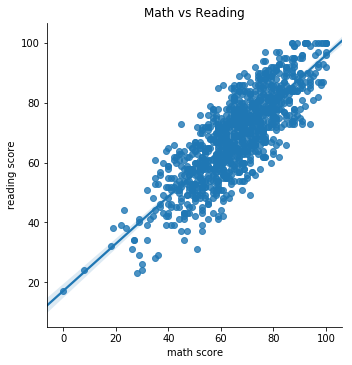

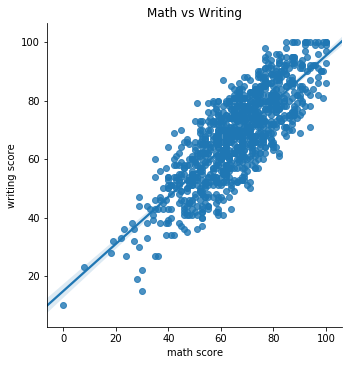

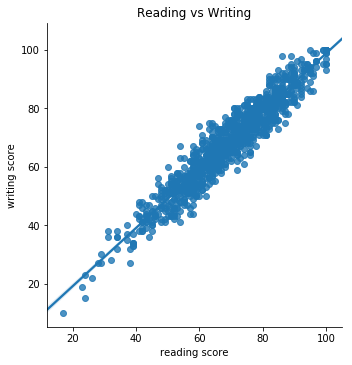

In [60]:
sns.lmplot('math score', 'reading score', data=df)
plt.title('Math vs Reading')
plt.show()

sns.lmplot('math score', 'writing score', data=df)
plt.title('Math vs Writing')
plt.show()

sns.lmplot('reading score', 'writing score', data=df)
plt.title('Reading vs Writing')
plt.show()

Text(0.5, 1.0, 'Test Score Correlation Map')

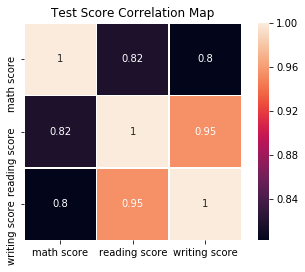

In [67]:
corrmat = df.corr()

sns.heatmap(corrmat, square=True, annot=True, linewidth=0.5)
plt.title("Test Score Correlation Map")

In [68]:
stats.ttest_ind(df['math score'], df['reading score'])

Ttest_indResult(statistic=-4.627084038100885, pvalue=3.946445546435526e-06)

In [69]:
stats.ttest_ind(df['math score'], df['writing score'])

Ttest_indResult(statistic=-2.8946336144447704, pvalue=0.00383720001523225)

In [70]:
stats.ttest_ind(df['writing score'], df['reading score'])

Ttest_indResult(statistic=-1.6731982103781682, pvalue=0.09444482452690019)

Although the largest correlation is between reading and writing, the differences do not appear to be significant!